In [8]:
import numpy as np
# import h5py
import matplotlib.pyplot as plt
from loadmodules import *

datadir = '/home/pdcg/Documents/post_analysis/'
# datadir = '/home/pdcg/runtest/'
isolated_gal = 'isolated_run/'

gyr = 3.15576e16 # in s
solar_mass_g = 1.989e33
G = 6.674e-8 # cm3 g-1 s-2
kpc = 3.09e21 # cm

In [6]:
s = gadget_readsnap(117, snappath=datadir+isolated_gal, applytransformationfacs=True)
s.centerat(s.boxsize/2)
s.data['r'] = np.sqrt(s.data['pos'][:,0]**2 + s.data['pos'][:,1]**2 + s.data['pos'][:,2]**2)
s.data['pres'] *= s.UnitMass_in_g / s.UnitLength_in_cm * (s.UnitVelocity_in_cm_per_s/s.UnitLength_in_cm)**2 # cgs

In [3]:
s.time

1.001953125

In [4]:
mask_gas = s.data['type']==0
mask_stars = s.data['type']==4
mask_clusters = s.data['nclt'] > 0

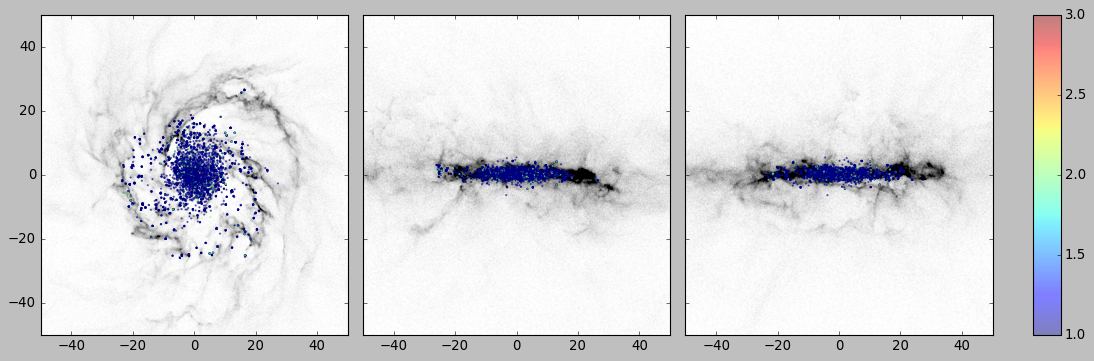

In [6]:
fig, ax = plt.subplots(1, 3 ,figsize=(17,5), sharey=True)
ax[0].scatter(s.data['pos'][mask_gas,0], s.data['pos'][mask_gas,1], c=s.data['rho'], s=0.1, alpha=0.01)
ax[0].scatter(s.data['pos'][mask_stars][mask_clusters,0], s.data['pos'][mask_stars][mask_clusters,1], c=s.data['incl'][mask_clusters], s=1, alpha=0.5, edgecolors='face')
ax[1].scatter(s.data['pos'][mask_gas,1], s.data['pos'][mask_gas,2], c=s.data['rho'], s=0.1, alpha=0.01)
ax[1].scatter(s.data['pos'][mask_stars][mask_clusters,1], s.data['pos'][mask_stars][mask_clusters,2], c=s.data['incl'][mask_clusters], s=1, alpha=0.5, edgecolors='face')
ax[2].scatter(s.data['pos'][mask_gas,0], s.data['pos'][mask_gas,2], c=s.data['rho'], s=0.1, alpha=0.01)
im = ax[2].scatter(s.data['pos'][mask_stars][mask_clusters,0], s.data['pos'][mask_stars][mask_clusters,2], c=s.data['incl'][mask_clusters], s=1, alpha=0.5, edgecolors='face')
ax[0].set(xlim=(-50,50), ylim=(-50,50))
ax[1].set(xlim=(-50,50), ylim=(-50,50))
ax[2].set(xlim=(-50,50), ylim=(-50,50))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.05, hspace=0.02)
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

In [7]:
s.data['l1'] = s.data['tijl'][:,0] * (gyr /(s.UnitLength_in_cm/s.UnitVelocity_in_cm_per_s))**2
s.data['l2'] = s.data['tijl'][:,1] * (gyr /(s.UnitLength_in_cm/s.UnitVelocity_in_cm_per_s))**2
s.data['l3'] = s.data['tijl'][:,2] * (gyr /(s.UnitLength_in_cm/s.UnitVelocity_in_cm_per_s))**2

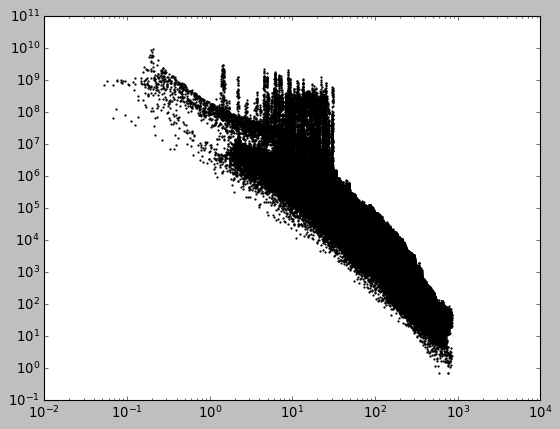

In [8]:
s.data['T_str'] = s.data['l1'] - 1/3*(s.data['l1'] + s.data['l2'] + s.data['l3'])

plt.scatter(s.data['r'], s.data['T_str'], s=1)
plt.xscale('log')
plt.yscale('log')
# plt.xlim(3e-1, 3e1)
# plt.ylim(-1e1, 1e8)

(0.3, 30.0)

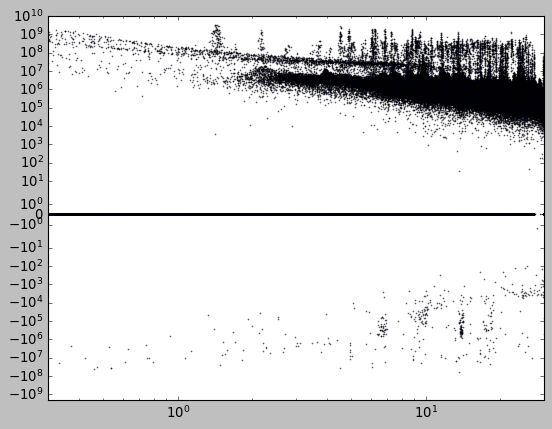

In [9]:
plt.scatter(s.data['r'], s.data['l1'], s=0.1)
plt.xscale('log')
plt.yscale('symlog')
plt.xlim(3e-1, 3e1)
# plt.ylim(-1e8, 1e8)

In [10]:
cluster_masses = s.data['mclt'][s.data['imcl']>0].flatten() * s.UnitMass_in_g/solar_mass_g
init_cluster_masses = s.data['imcl'][s.data['imcl']>0].flatten() * s.UnitMass_in_g/solar_mass_g

(-500.0, 15000.0)

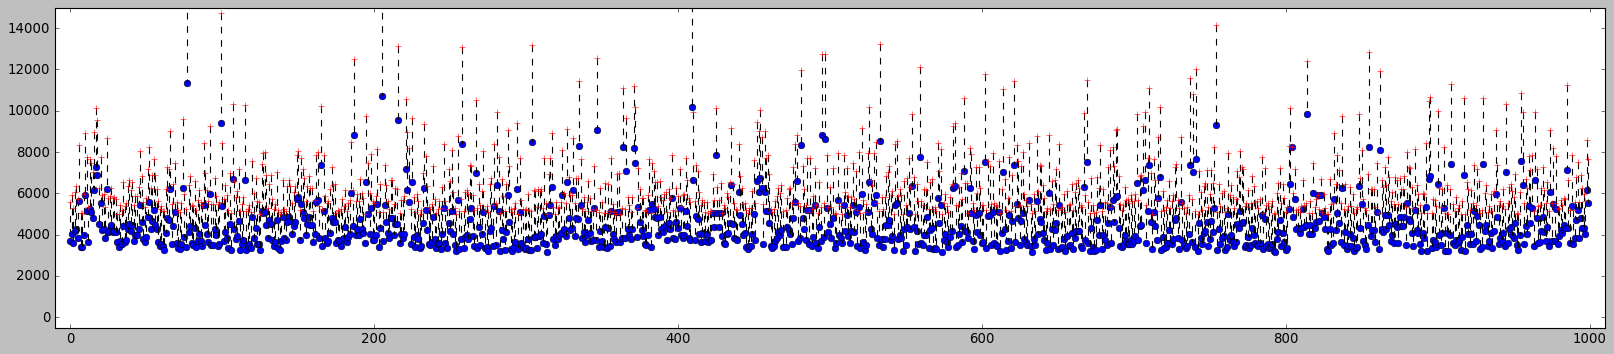

In [11]:
plt.figure(figsize=(25,5))
for i in range(len(init_cluster_masses[:1000])):
    if(cluster_masses[i]>0):
        plt.plot(i,cluster_masses[i], 'bo')
    else:
        plt.plot(i, cluster_masses[i], 'g+')
    plt.plot([i, i], [init_cluster_masses[i], cluster_masses[i]], 'k--')

plt.plot(init_cluster_masses[:1000], 'r+')
plt.xlim(-10,len(init_cluster_masses[:1000])+10)
plt.ylim(-500, 15000)

In [19]:
mask = (s.data['r']<40) * (np.abs(s.data['pos'][:,2])<2)
rad_massprof = s.get_radmassprof(nshells=100, mask=mask)
enclosed_mass = rad_massprof[0,:] * s.UnitMass_in_g # [g]
rad = rad_massprof[1,:] * s.UnitLength_in_cm # [cm]
circ_vel = np.sqrt(G*enclosed_mass/(rad**3))*3.16e16 # [Gyr-1]

dr set to 0.399977
Calculation took 0.004834s


In [13]:
circ_vel_est = np.sqrt(abs(1/3 * (s.data['l1'] + s.data['l2'] + s.data['l3'])))

(0.3, 1000.0)

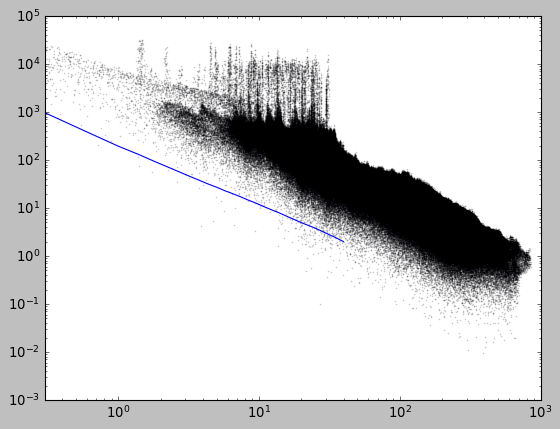

In [14]:
plt.scatter(s.data['r'], circ_vel_est, s=0.01)
plt.loglog(rad/3.086e21, circ_vel)
plt.ylim(1e-3, 1e5)
plt.xlim(3e-1, 1e3)

In [20]:
hqm200 = 112.233 * 1e10 * solar_mass_g
hqc = 12.0
hqdm = 0.9554374

In [21]:
a = (G*hqm200)**(1/3)/hqc *np.sqrt(2*(np.log(1+hqc) - hqc/(1+hqc)))

In [22]:
hqm = hqm200*hqdm * (rad/(rad + a))**2

In [18]:
T = (G * hqm / rad**3) * (3.16e16)**2

(0.3, 1000.0)

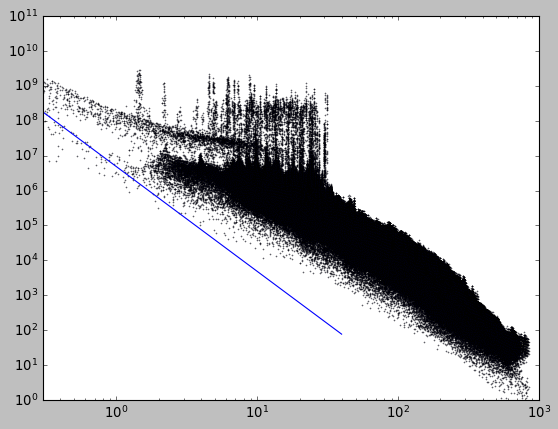

In [19]:
plt.scatter(s.data['r'], s.data['T_str'], s=0.1)
plt.loglog(rad/3.086e21, T)
plt.ylim(1e0, 1e11)
plt.xlim(3e-1, 1e3)

In [3]:
mask = (s.data['r']<40) * (np.abs(s.data['pos'][:,2])<2)
rad_massprof = s.get_radmassprof(nshells=100, mask=mask, center=[0,0,0])
enclosed_mass = rad_massprof[0,:] * s.UnitMass_in_g # [g]
rad = rad_massprof[1,:] # [kpc]

dr set to 0.399977


Calculation took 0.004106s


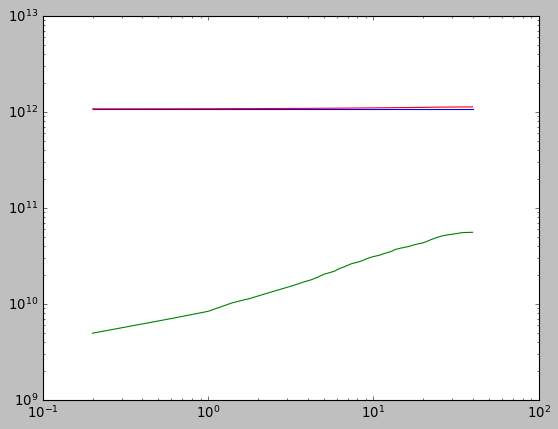

In [28]:
plt.loglog(rad, hqm/solar_mass_g)
plt.loglog(rad, enclosed_mass/solar_mass_g)
plt.loglog(rad, (hqm + enclosed_mass)/solar_mass_g)

In [4]:
surfdens = (enclosed_mass)/solar_mass_g/ (4 * np.pi * rad**2) # msun/kpc2

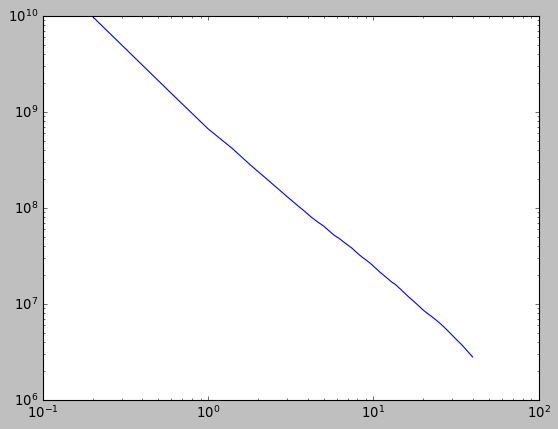

In [5]:
plt.loglog(rad, surfdens)

In [7]:
pressure = s.get_radprof('pres', nshells=100, mask_in_data=mask, center=[0,0,0])

dr set to 8.59266
Calculation took 0.01588s


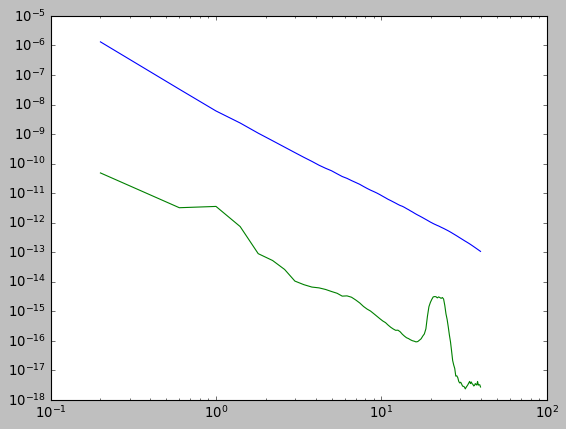

In [8]:
plt.loglog(rad, (surfdens * solar_mass_g / kpc**2)**2 * np.pi * G * 3/2)
plt.loglog(rad, pressure[0,:])

In [1]:
import pynbody
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = pynbody.load('isolated_run/snapshot_117.hdf5')

/home/pdcg/anaconda3/lib/python3.9/site-packages/pynbody/snapshot/gadgethdf.py:370: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


In [3]:
s.physical_units()

In [4]:
s['pos'] -= s.properties['boxsize']/2

In [19]:
pg = pynbody.analysis.profile.Profile(s.g, rmin=0, rmax=20, nbins=50)
pg['density']

SimArray([24289602.73153343,  3261793.68659529,  2138136.84352888,
           4915890.91541427,  5765669.87143083, 12292384.11677481,
          10738573.32788636, 11601441.48277357,  8655184.7117455 ,
           9616707.91814669,  8208799.67758928,  7052626.76542903,
           5723277.96204089,  5393530.54144822,  6561600.47946197,
           8871452.60246707, 12879874.20507305, 13429691.45022358,
          12778780.94044151, 12407219.04559742, 11033976.18942598,
          11143678.23416414,  9726616.41277717, 10476852.94836343,
          15472121.1183362 , 12530505.84169696, 10829159.37822026,
           9957754.14644574, 13321960.08352689, 15680974.375215  ,
          13561319.26744995, 12822244.72839933, 14960243.40250687,
          15918859.8423742 , 13329479.28658052, 10476212.28413821,
           9005320.68749946,  8483526.33163497,  9052991.11809164,
           9135179.45282771,  9922768.39604759,  9473535.76455494,
          10569046.12032315, 10383790.95457666, 10566987.65468

In [16]:
p = pynbody.analysis.profile.Profile(s, rmin=0, rmax=20, nbins=50)
p['density']

SimArray([1.07053095e+10, 1.39710207e+09, 5.24980958e+08, 5.40698380e+08,
          2.52972156e+08, 2.30618869e+08, 1.73793476e+08, 1.43710089e+08,
          1.22148198e+08, 1.08012355e+08, 8.33841728e+07, 1.07156205e+08,
          1.07563643e+08, 5.90622155e+07, 6.71268747e+07, 8.90104023e+07,
          6.31145807e+07, 6.97103453e+07, 5.03180483e+07, 2.87098214e+07,
          3.73373273e+07, 3.98221568e+07, 4.53110360e+07, 3.90099412e+07,
          3.25397673e+07, 1.99297627e+07, 2.24937513e+07, 2.00823721e+07,
          2.94003788e+07, 2.31308306e+07, 2.34413941e+07, 2.02384013e+07,
          2.45343388e+07, 3.62300464e+07, 2.25233621e+07, 1.31211262e+07,
          1.82324955e+07, 1.18279098e+07, 1.61471875e+07, 1.29762031e+07,
          1.54771887e+07, 1.54836759e+07, 1.68148059e+07, 1.39951944e+07,
          1.57011466e+07, 1.28638259e+07, 1.44671624e+07, 1.29696254e+07,
          1.10974167e+07, 1.18030412e+07], 'Msol kpc**-2')

Text(0, 0.5, 'Pressure [$M_\\odot \\rm{km}^2\\, \\rm{s}^{-2}\\, \\rm{kpc}^{-3}$]')

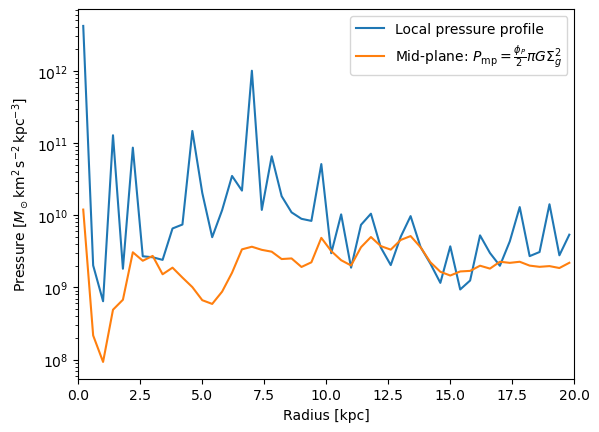

In [21]:
solar_mass_g = 1.989e33
# G = 6.674e-8 # cm3 g-1 s-2
G = 4.3e-6 #kpc msun-1 km2 s-2
kpc = 3.09e21 # cm
plt.plot(pg['rbins'], pg['Pressure'], label="Local pressure profile")
plt.plot(pg['rbins'], pg['density']**2 * np.pi * G * 3/2, label=r"Mid-plane: $P_{\rm{mp}} = \frac{\phi_P}{2} \pi G \Sigma_g^2$")
plt.semilogy()
plt.legend()
plt.xlim(0,20)
plt.xlabel("Radius [kpc]")
plt.ylabel(r"Pressure [$M_\odot \rm{km}^2\, \rm{s}^{-2}\, \rm{kpc}^{-3}$]")